In [29]:
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from timerun import time_code, time_func
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the madelon training dataset
train_data = pd.read_table("MADELON/madelon_train.data", sep=' ', header=None, usecols=range(0,500))
train_labels = pd.read_table("MADELON/madelon_train.labels", sep=' ', header=None)
X_train, X_test = np.split(train_data.to_numpy(), [1600])
y_train, y_test = np.split(np.ravel(train_labels.to_numpy()), [1600])

In [47]:
import random
def randomSelection(CVal):
    random_scores_train = {}
    random_scores_test = {}
    random_selection = random.sample(range(0, 500), 500)
    for i in range(1, 500, 2):
        features = random_selection[:i]
    
        svm = LinearSVC(C=CVal, max_iter=2000, dual=False)
        svm.fit(X_train[:,features], y_train)

        random_scores_train[i] = svm.score(X_train[:,features], y_train)
        random_scores_test[i] = svm.score(X_test[:,features], y_test)
    return random_scores_train, random_scores_test

rscore = {}
for i in range(0, 12):
    with time_code('TEST C#' + str(i)):
        rscore[i] = randomSelection(10**i)

TEST C#0 - 00:02:28.108568100
TEST C#1 - 00:02:27.477668400
TEST C#2 - 00:02:25.592764300
TEST C#3 - 00:02:19.789577500
TEST C#4 - 00:02:24.014379500
TEST C#5 - 00:02:33.263057100
TEST C#6 - 00:02:05.599401500
TEST C#7 - 00:02:25.293147400
TEST C#8 - 00:02:12.592997100
TEST C#9 - 00:02:44.607148300
TEST C#10 - 00:02:13.969895000
TEST C#11 - 00:02:19.059292000


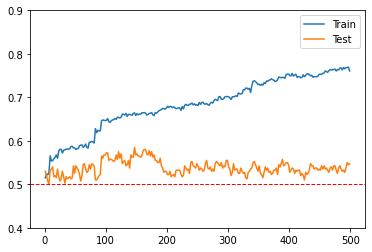

In [66]:
k = 1
plt.plot(rscore[k][0].keys(), rscore[k][0].values(), label = "Train")
plt.plot(rscore[k][1].keys(), rscore[k][1].values(), label = "Test")
plt.legend()
plt.ylim([0.4,0.9])
plt.axhline(0.5, color = "red", linewidth=1, linestyle="--")
plt.show()

In [51]:
import pickle
f = open("svm-madelon-base-data-random.pkl","wb")
pickle.dump(rscore,f)
f.close()

import json

json = json.dumps(rscore)
f = open("svm-madelon-base-data-random.json","w")
f.write(json)
f.close()